In [33]:
import os
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights
from torchvision.ops import box_iou, box_convert
from pycocotools.coco import COCO
from tqdm import tqdm
import torchvision.transforms as tvt
from PIL import Image
import os
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import torchvision.transforms.functional as tvtf
import matplotlib.pyplot as plt
from torchmetrics.classification import BinaryJaccardIndex

from models.iou_predictor.iou_predictor import iou_predictor
from dataset.transforms import Resize_with_pad
import random


In [18]:
def filter_humans(preds):
    boxes = preds['boxes']
    labels = preds['labels']
    scores = preds['scores']
    masks = preds['masks']

    human_boxes = []
    human_labels = []
    human_scores = []
    human_masks=[]


    for b, l, s, m in zip(boxes, labels, scores, masks):
        if l == 1:
            human_boxes.append(b.detach().cpu())
            human_labels.append(l.detach().cpu())
            human_scores.append(s.detach().cpu())
            human_masks.append(m.detach().cpu())
            # gt_iou = box_iou(b.unsqueeze(dim=0).detach().cpu(), box_convert(torch.FloatTensor(gt_box), "xywh", "xyxy").unsqueeze(dim=0))
            # human_gt_iou.append(gt_iou)


    return {"boxes":human_boxes,
            "labels":human_labels,
            "scores":human_scores,
            "masks":human_masks}



In [19]:
iou_model = iou_predictor(model_name = "resnet50", probabilistic=False).cuda()
weights = torch.load("checkpoints/iou_prediction_resnet50_MSE.pth")
iou_model.load_state_dict(weights['model_state_dict'])
iou_model.eval()

iou_model_probabilistic = iou_predictor(model_name = "resnet50", probabilistic=True).cuda()
weights = torch.load("checkpoints/iou_prediction_resnet50_Probabilistic_gnll_v3.pth")
iou_model_probabilistic.load_state_dict(weights['model_state_dict'])
iou_model_probabilistic.eval()

model = maskrcnn_resnet50_fpn_v2(MaskRCNN_ResNet50_FPN_V2_Weights).eval().cuda()

transform = tvt.Compose([
                            tvt.ToTensor(),
                        ])

crop_transform = tvt.Compose([
    Resize_with_pad(512,512)
])
image = Image.open("/home/venky/Documents/thesis proposal/iou prediction/data acquisition/meta-model-uncertainty/Images/test_sample_2.png")
image = transform(image)


/home/venky/.conda/envs/text/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/venky/.conda/envs/text/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


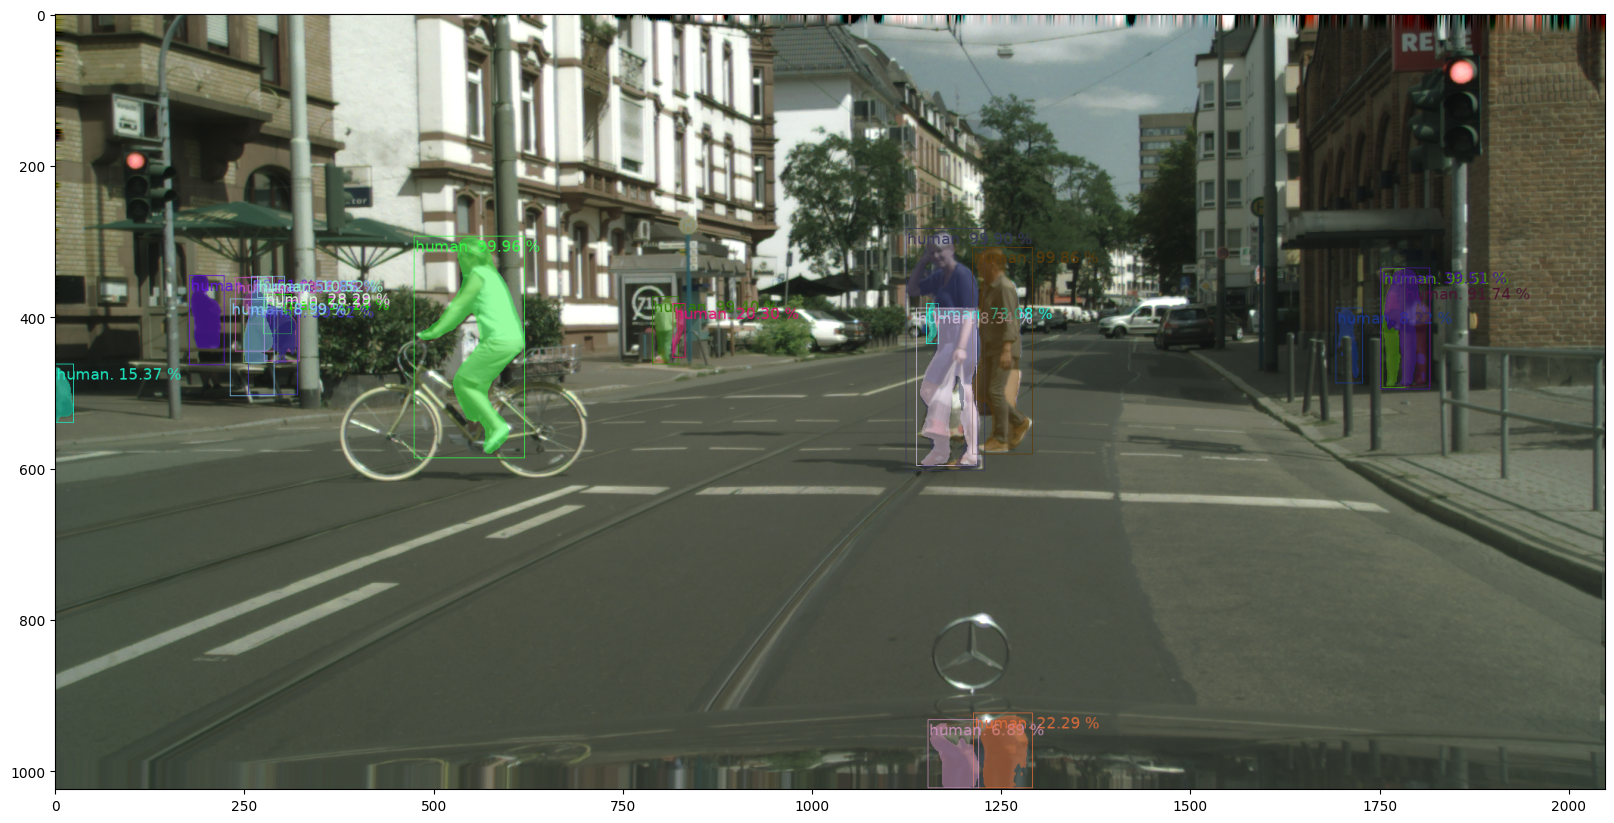

In [35]:
with torch.no_grad():
    preds = model(image.unsqueeze(dim=0).cuda())[0]
human_preds = filter_humans(preds)

colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(len(human_preds['boxes']))]
labels=[f"human. {score*100:.2f} %"for score in human_preds['scores']]
bbox_image = draw_bounding_boxes(image = (image*255).type(torch.uint8), boxes = torch.vstack(human_preds['boxes']), labels=labels, colors=colors, font="/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", font_size=20)
segmentation_image = draw_segmentation_masks(image = bbox_image, masks = torch.vstack(human_preds['masks'] )> 0.5, colors = colors, alpha=0.5)


fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(tvtf.to_pil_image(segmentation_image))
plt.show()

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


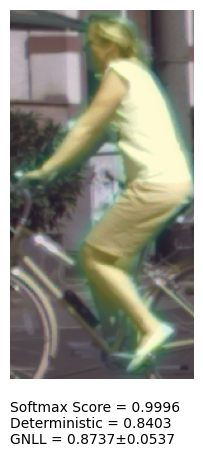

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


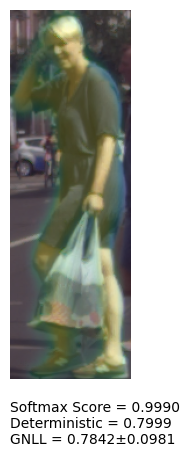

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


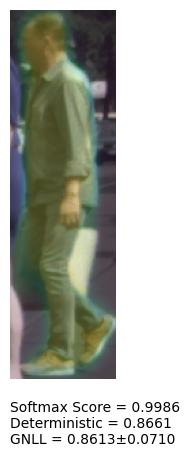

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


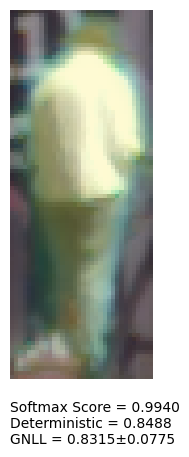

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


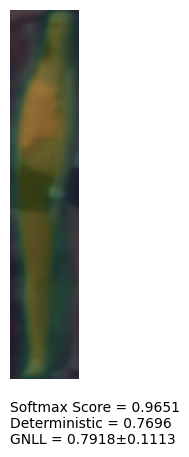

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


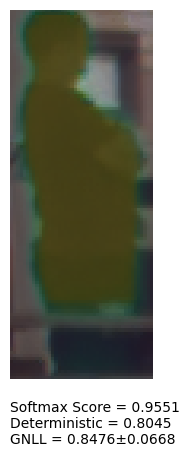

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


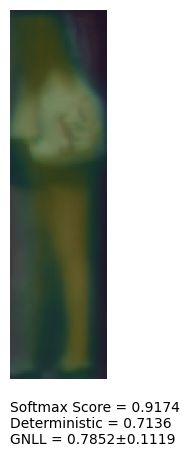

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


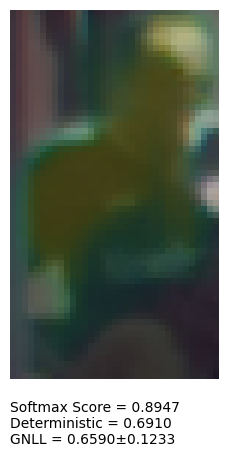

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


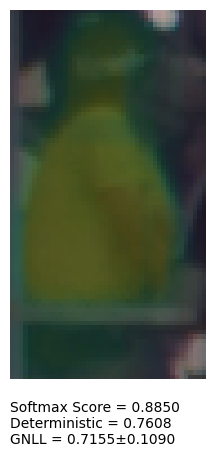

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


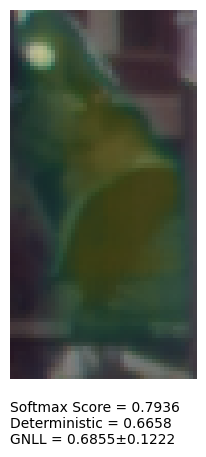

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


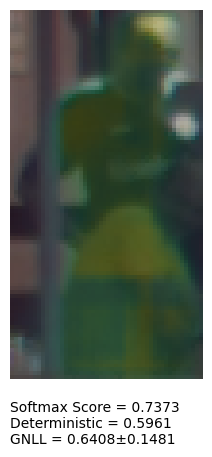

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


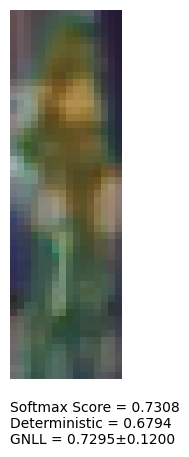

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


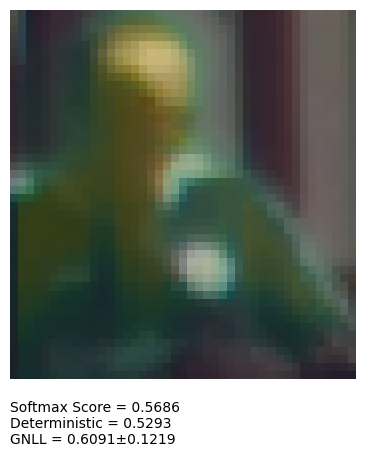

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


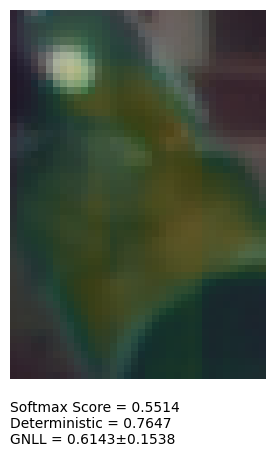

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


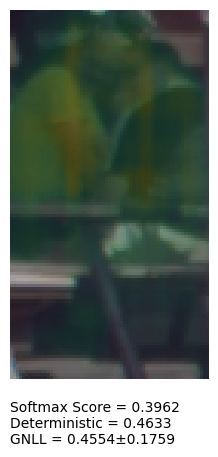

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


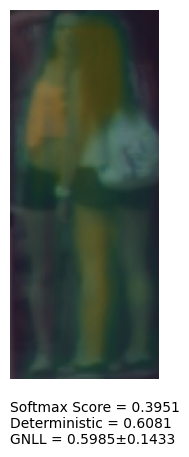

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


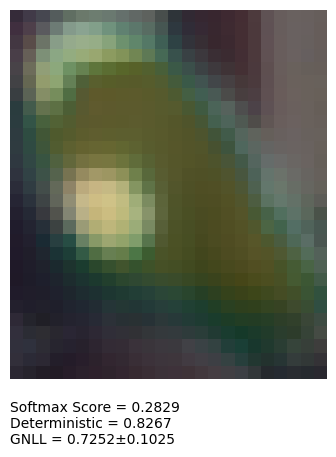

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


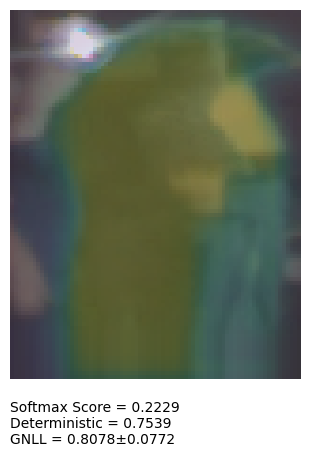

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


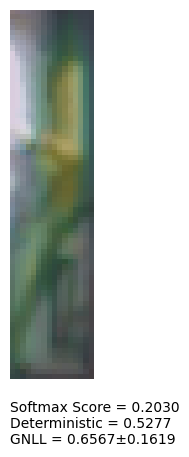

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


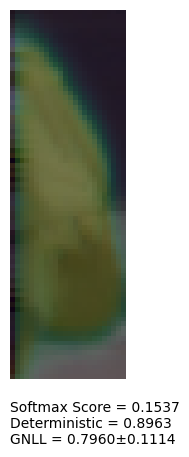

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


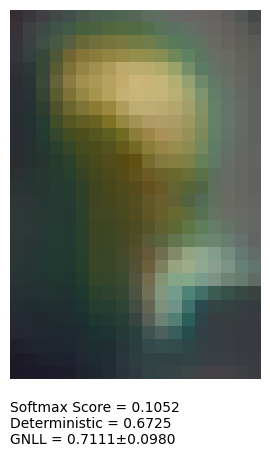

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


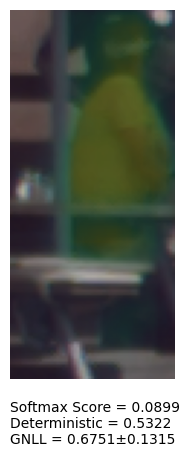

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


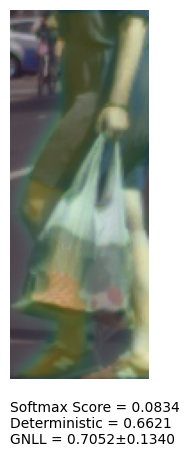

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


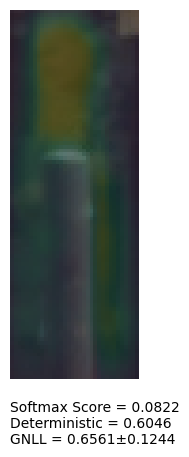

torch.Size([1, 512, 512]) torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


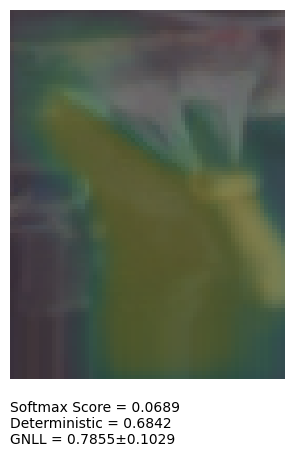

In [46]:
def crop_image(image, bbox, mask):
    bbox = box_convert(bbox, in_fmt="xyxy", out_fmt="xywh")
    cropped = tvtf.crop(image, top = int(bbox[1]), left = int(bbox[0]), height = int(bbox[3]), width = int(bbox[2]))
    # mask = tvtf.crop(torch.from_numpy(mask), top = int(bbox[1]), left = int(bbox[0]), height = int(bbox[3]), width = int(bbox[2]))
    predicted = tvtf.crop(mask, top = int(bbox[1]), left = int(bbox[0]), height = int(bbox[3]), width = int(bbox[2]))

    return cropped, predicted

boxes = torch.vstack(human_preds['boxes']) #xmin, ymin, xmax, ymax
masks = torch.vstack(human_preds['masks'] )
scores = human_preds['scores']


for b,m,s in zip(human_preds['boxes'], human_preds['masks'], human_preds['scores']):
    cimage,predicted = crop_image(image, b, m)
    cropped_resize = crop_transform(cimage)
    cropped_predicted = crop_transform(predicted)
    print(cropped_predicted.shape, cropped_resize.shape)
    with torch.no_grad():
        iou_estimate = iou_model(torch.cat([cropped_resize.cuda(), cropped_predicted.cuda()], dim = 0).unsqueeze(dim=0)).item()
        iou_mean, iou_variance = iou_model_probabilistic(torch.cat([cropped_resize.cuda(), cropped_predicted.cuda()], dim = 0).unsqueeze(dim=0))
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    print(cropped_resize.shape)
    ax.imshow(tvtf.to_pil_image(cimage.squeeze()))
    ax.imshow(predicted.squeeze(), alpha = 0.2)
    ax.set_axis_off()
    ax.text(0, -0.12, f'Softmax Score = {s:.4f}\nDeterministic = {iou_estimate:.4f} \nGNLL = {iou_mean.item():.4f}±{torch.sqrt(iou_variance).item():.4f}', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    
    plt.show()